In [90]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_numerics
import ariel_gp
import time
import numpy as np
import multiprocess
import importlib
import copy
import cupy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm

In [91]:
train_data = kgs.load_all_train_data()
kgs.debugging_mode = 2

<module 'ariel_load' from '/mnt/d/ariel2/code/core/ariel_load.py'>

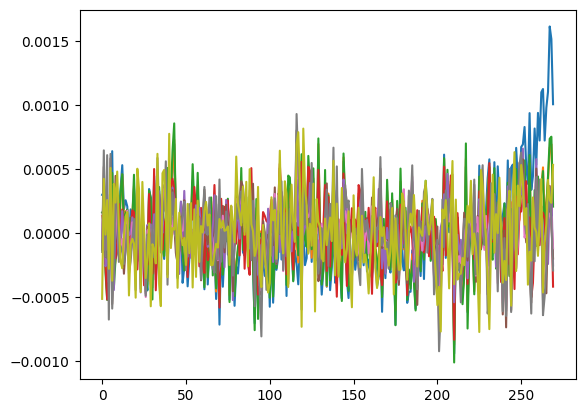

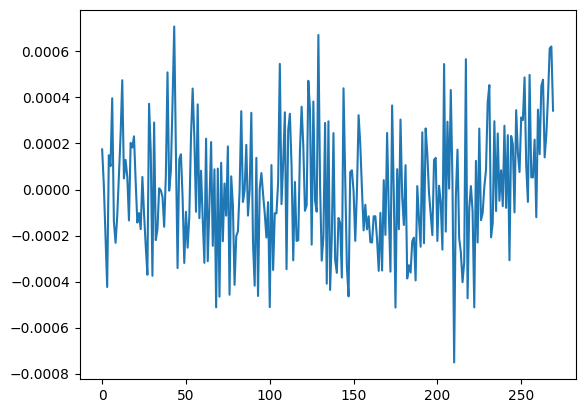

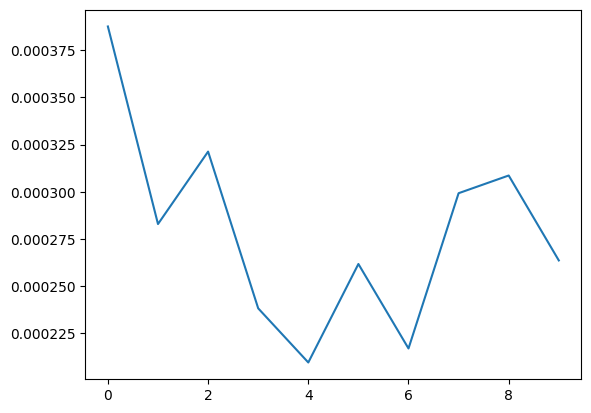

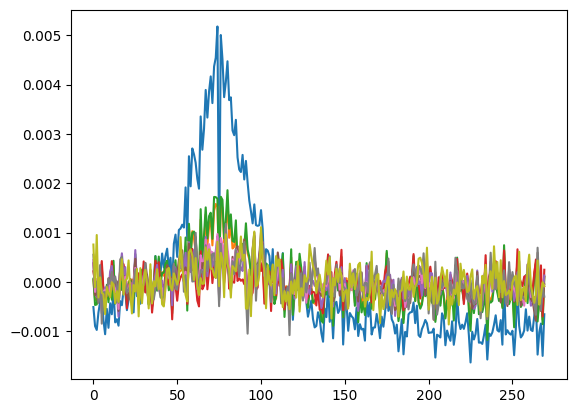

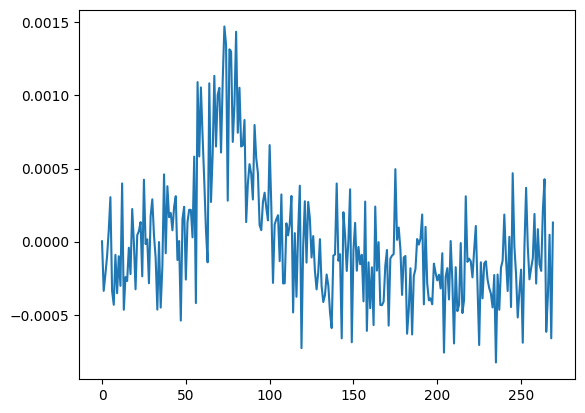

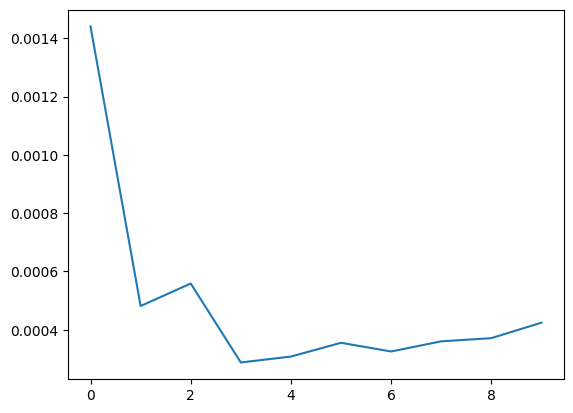

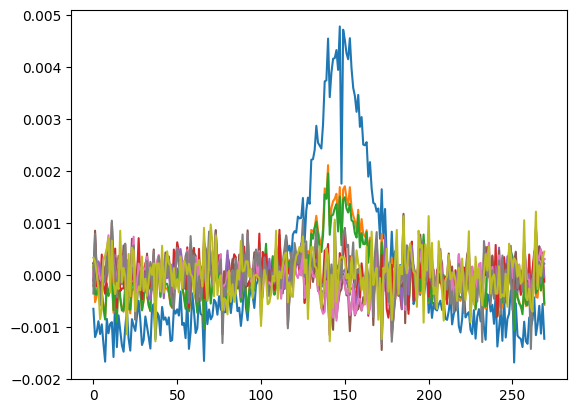

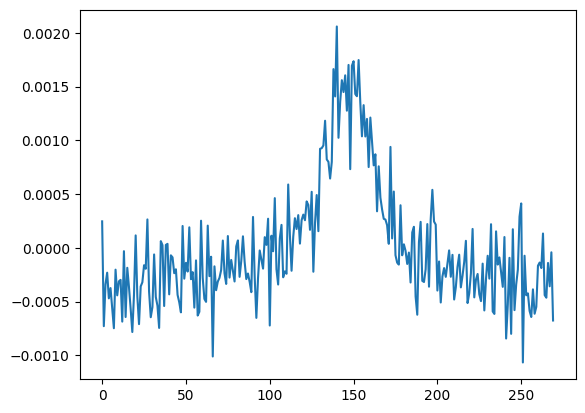

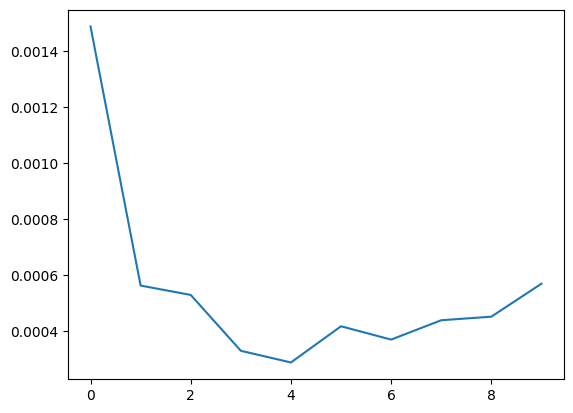

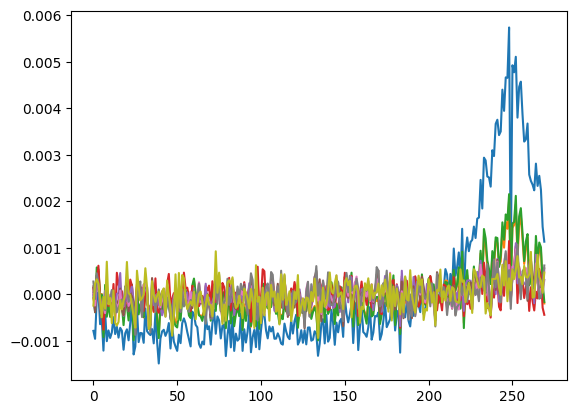

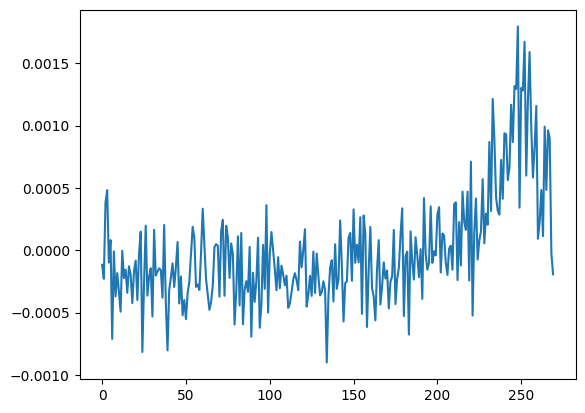

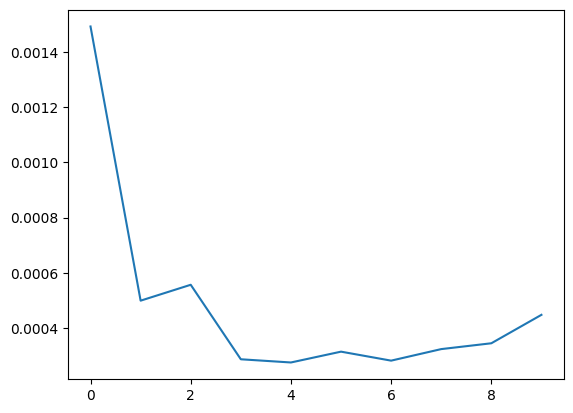

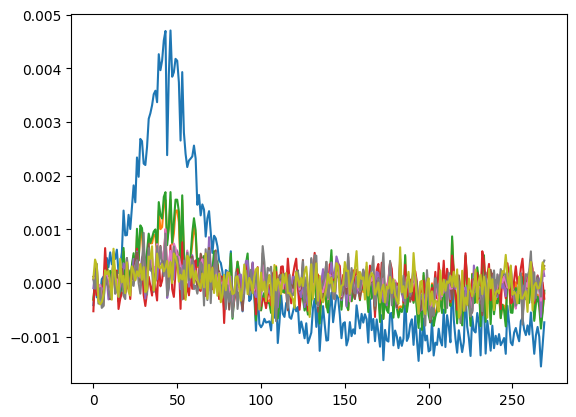

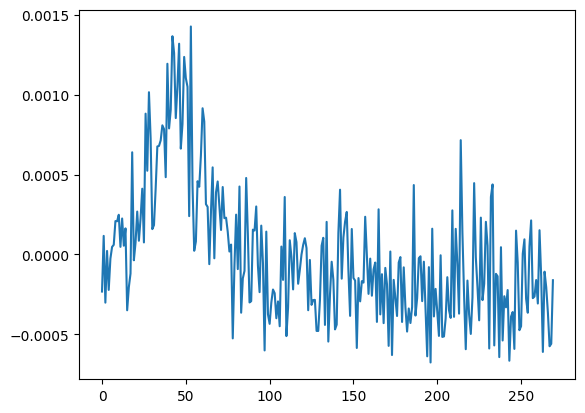

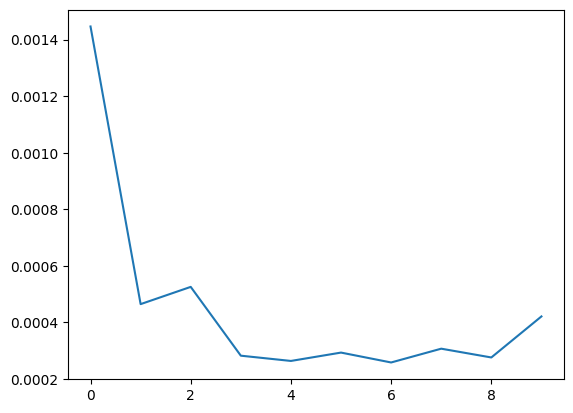

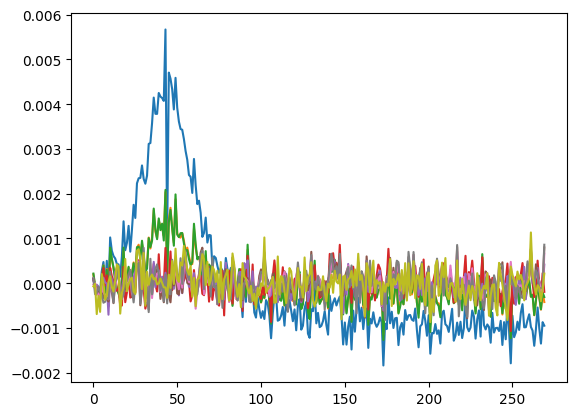

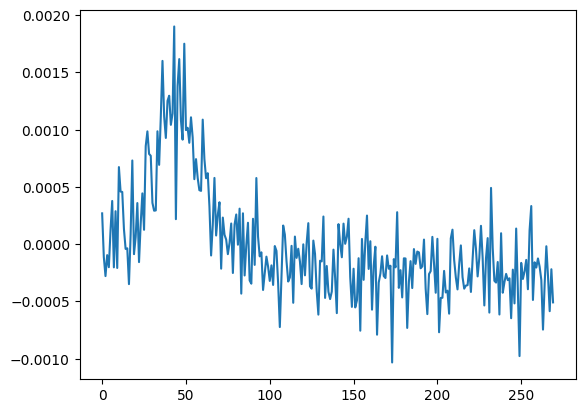

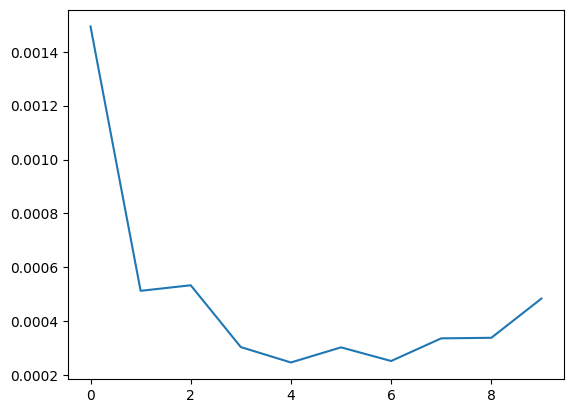

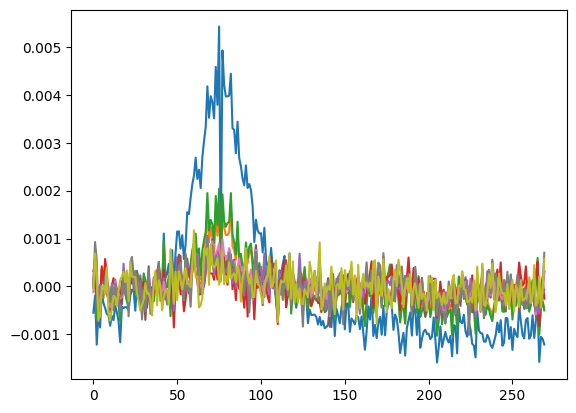

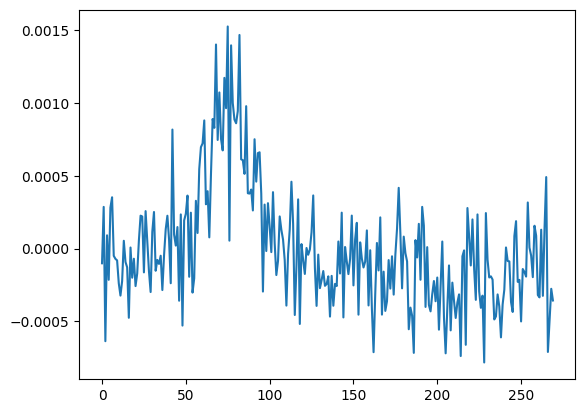

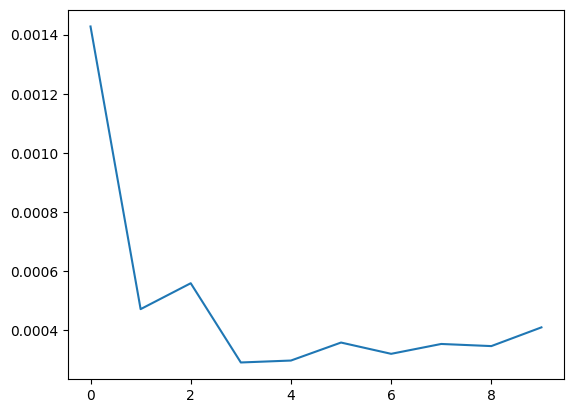

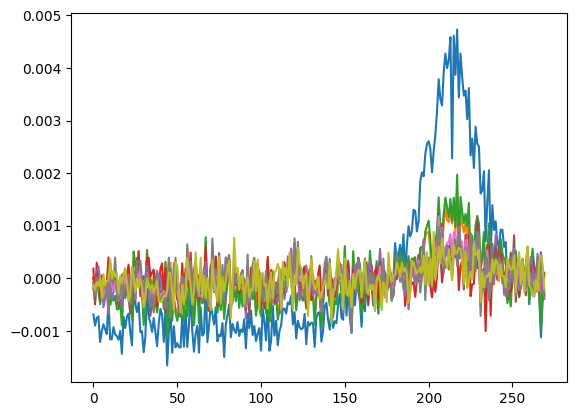

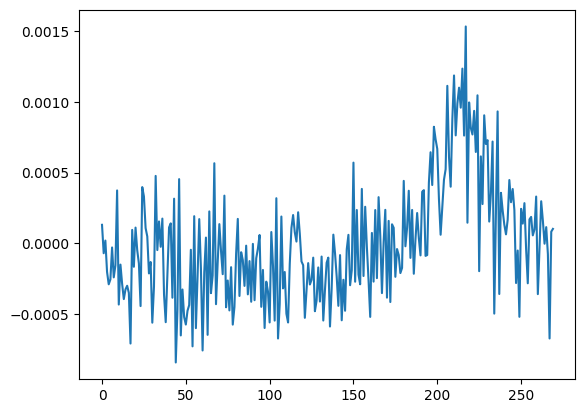

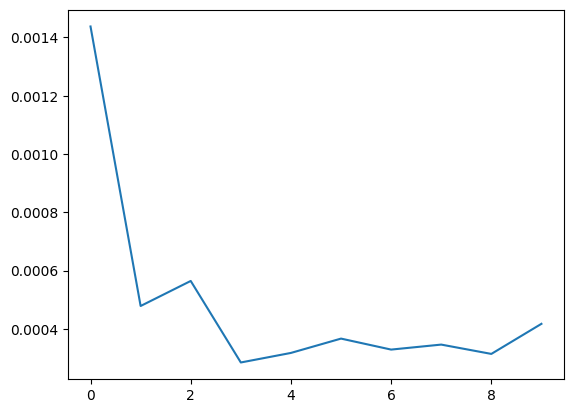

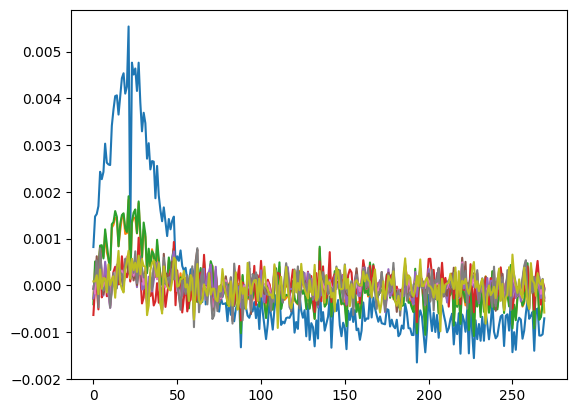

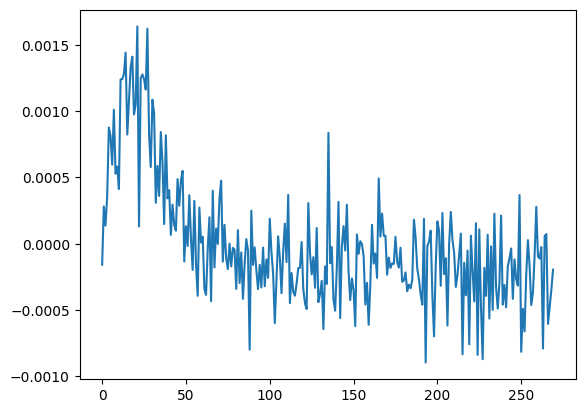

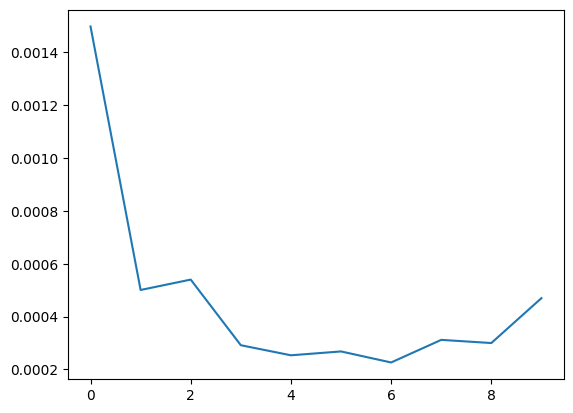

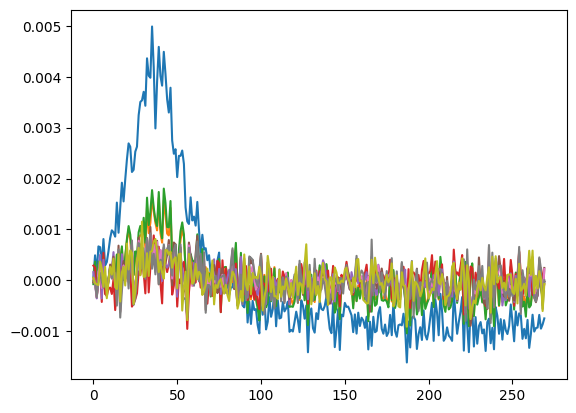

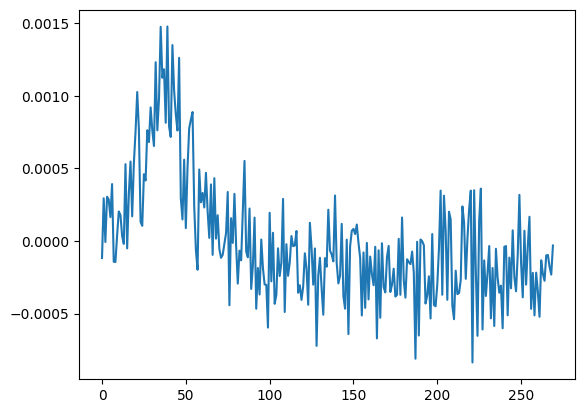

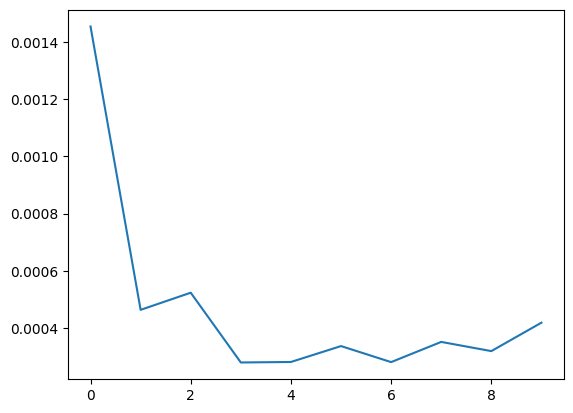

In [121]:
import ariel_load
importlib.reload(ariel_load)

def evall(a,b):
    a = a/kgs.rms(a)
    b = b/kgs.rms(b)
    return kgs.rms(a-b).get()
def plot_scaled(x):
    x = x/kgs.rms(x)
    x = x-ref/kgs.rms(ref)
    plt.plot(x.get())
def plot_scaled_c(x,c):
    x = x/kgs.rms(x)
    plt.plot(x.get(), color=c)
for dd in train_data[:10]:
    loaders = ariel_load.default_loaders()
    loaders[0].cache_steps = []
    loaders[0].apply_time_binning.time_binning*=5

    d = copy.deepcopy(dd)
    d.load_to_step(5, loaders)
    ref = copy.deepcopy(d.transits[0].data[0].data)
    d.load_to_step(3, loaders)
    d.transits[0].data[0].data[:,15:17,15:17]= cp.nan
    options = ariel_load.apply_pca_modelOptions()
    options.include_diagnostics = True
    v=[]
    plt.figure()
    for nc in range(1,10):
        options.n_components = nc
        weighted_coeffs, residual = ariel_load.apply_pca_model(d.transits[0].data[0].data.reshape(-1,1024,1), [0], options)
        weighted_coeffs = weighted_coeffs[:,0]
        #r = weighted_coeffs/kgs.rms(weighted_coeffs)
        #_,ax = plt.subplots(1,2,figsize=(12,6))
        plot_scaled(weighted_coeffs)
        v.append(evall(weighted_coeffs,ref))
    d.load_to_step(5, loaders)
    #plt.plot(d.transits[0].data[0].data.get())
    plt.figure()
    plot_scaled(d.transits[0].data[0].data)
    v.append(evall(d.transits[0].data[0].data,ref))
    #plt.plot(ref.get(), color='black')
    #plot_scaled_c(weighted_coeffs, 'black')
    plt.figure()
    plt.plot(v)
    plt.pause(0.001)

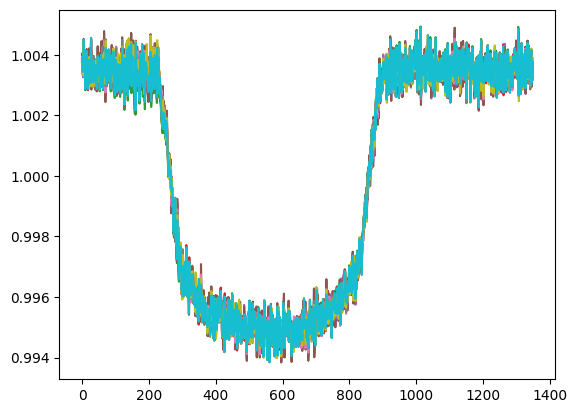

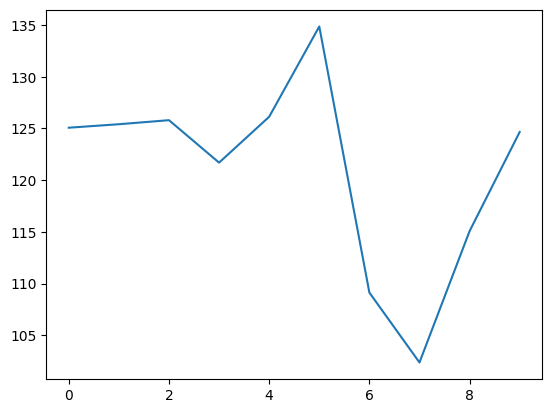

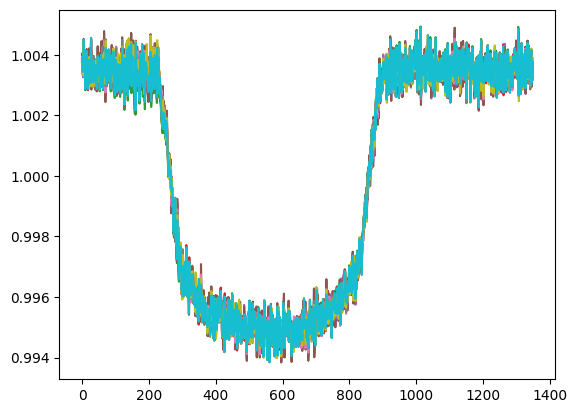

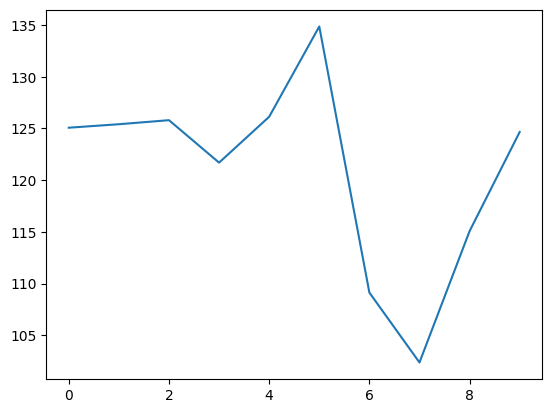

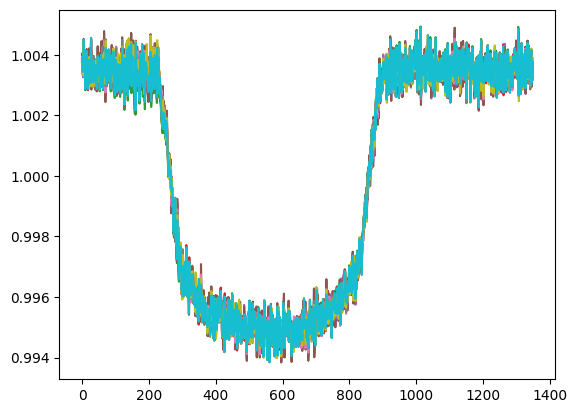

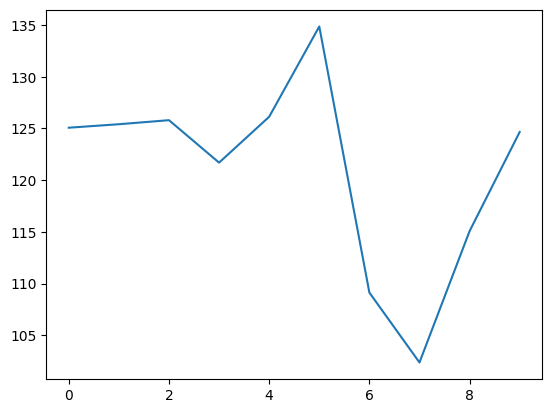

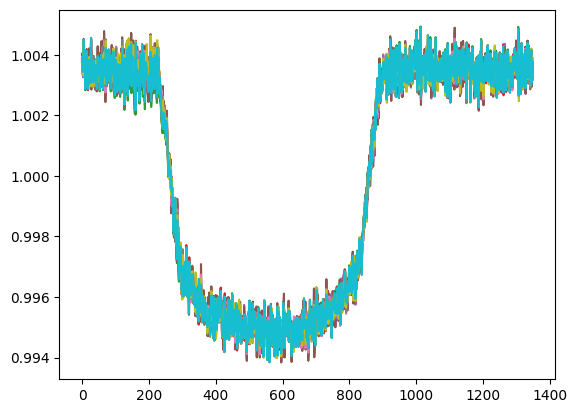

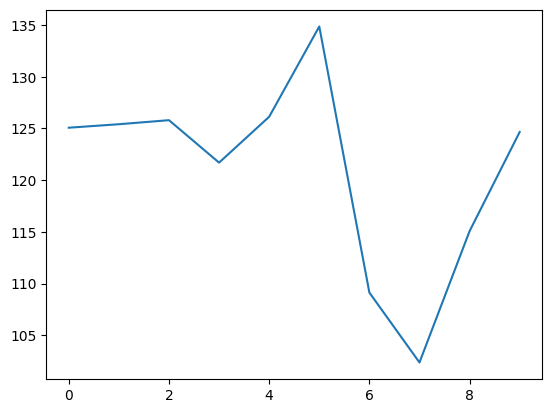

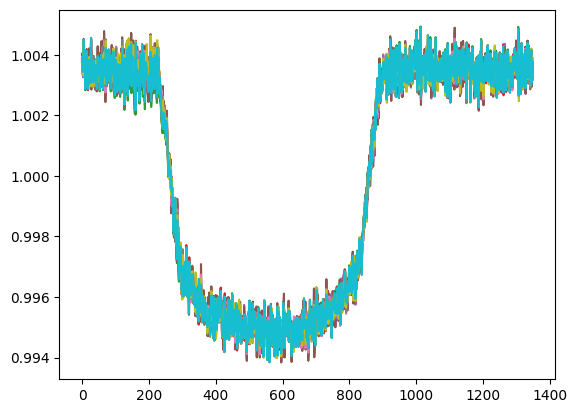

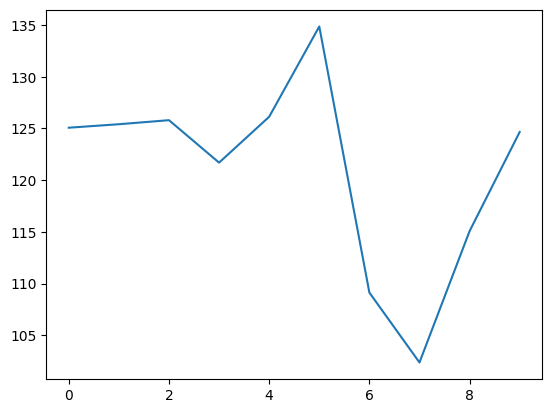

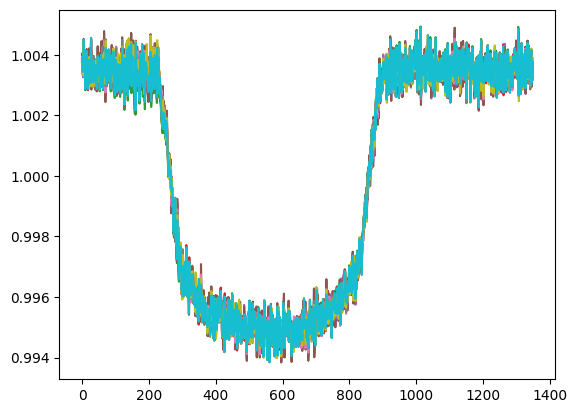

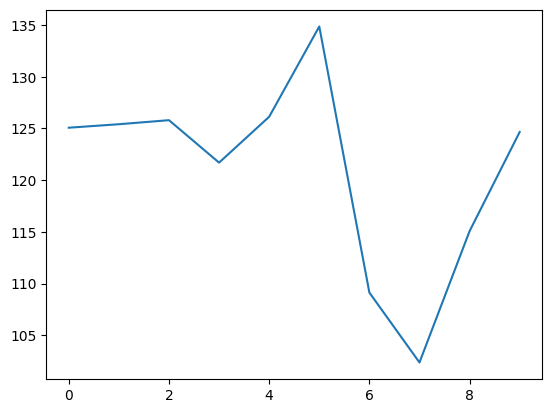

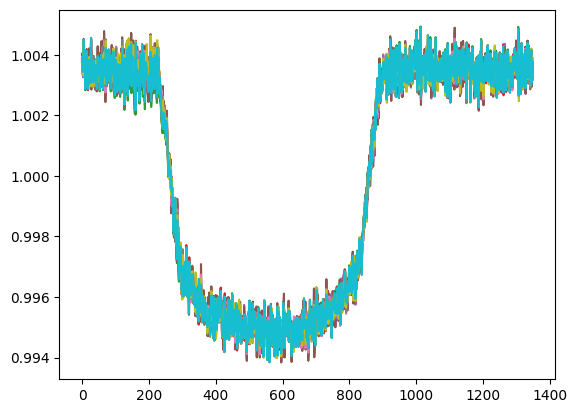

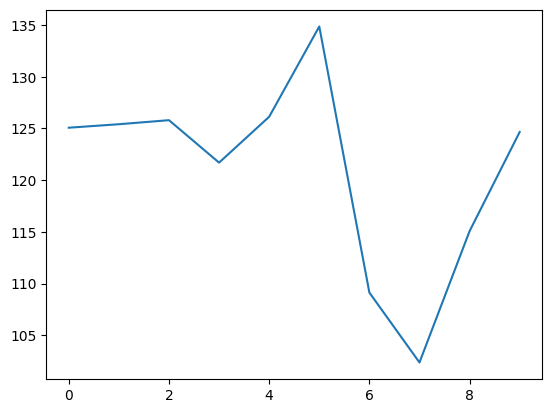

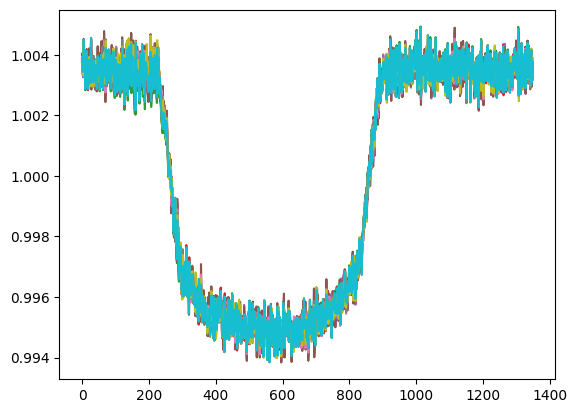

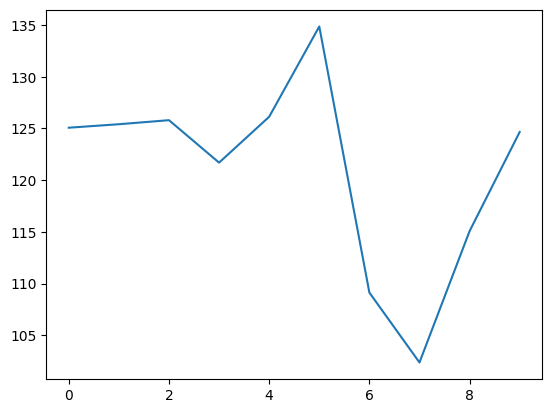

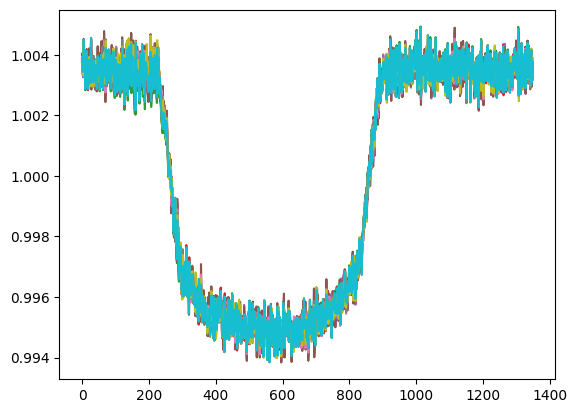

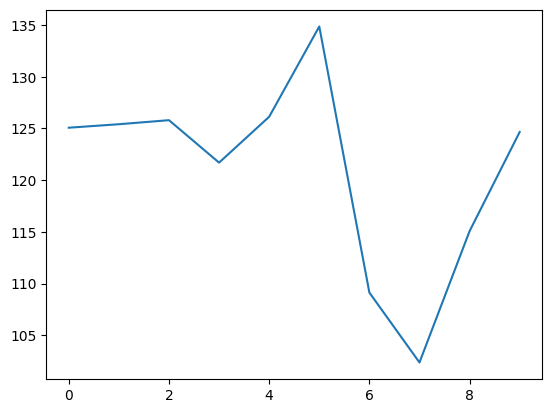

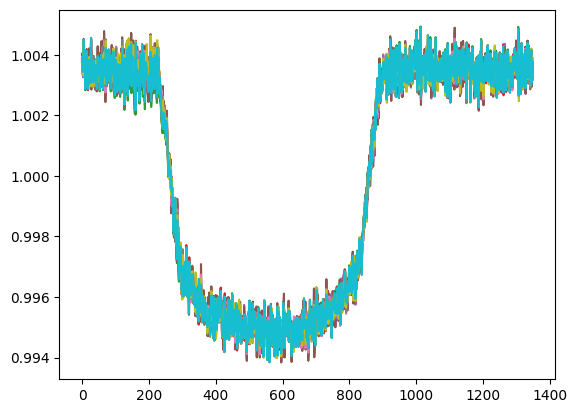

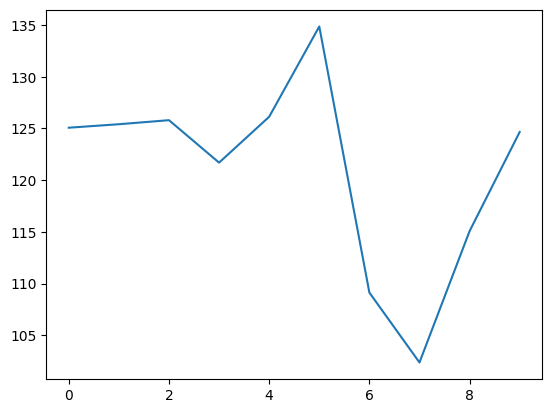

In [123]:
import ariel_load
importlib.reload(ariel_load)

def plot_scaled(x):
    x = x/kgs.rms(x)
    plt.plot(x.get())
for dd in train_data[:10]:
    loaders = ariel_load.default_loaders()
    loaders[0].cache_steps = []

    d = copy.deepcopy(dd)
    d.load_to_step(3, loaders)
    options = ariel_load.apply_pca_modelOptions()
    options.include_diagnostics = True
    v=[]
    plt.figure()
    for nc in range(1,10):
        options.n_components = nc
        weighted_coeffs, residual = ariel_load.apply_pca_model(d.transits[0].data[0].data.reshape(-1,1024,1), [0], options)
        #r = weighted_coeffs/kgs.rms(weighted_coeffs)
        #_,ax = plt.subplots(1,2,figsize=(12,6))
        plot_scaled(weighted_coeffs)
        v.append(ariel_numerics.estimate_noise_cp(weighted_coeffs).get())
    d.load_to_step(5, loaders)   
    plot_scaled(d.transits[0].data[0].data)   
    v.append(ariel_numerics.estimate_noise_cp(d.transits[0].data[0].data).get())
    plt.figure()
    plt.plot(v)
    plt.pause(0.001)

In [33]:
residual.shape

(1024, 1)

In [77]:
print(weighted_coeffs.shape)

(1350, 2)
